# CNN in Cifar 10

In [1]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 17s 0us/step


In [0]:
import matplotlib.pyplot as plt
import numpy as np
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

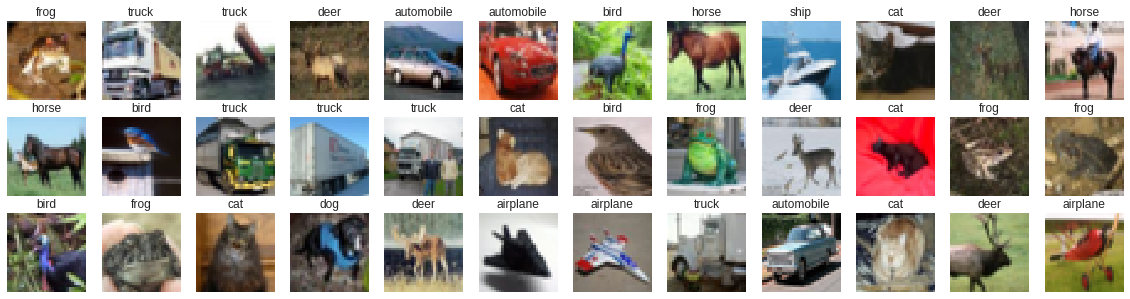

In [19]:
fig = plt.figure(figsize = (20,5))
for i in range(36):
  ax = fig.add_subplot(3,12,i+1,xticks=[], yticks=[])
  ax.imshow(np.squeeze(x_train[i]))
  ax.set_title(cifar10_labels[y_train[i][0]])

In [0]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [22]:
from keras.utils import np_utils, to_categorical
number_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, number_classes)
y_test = to_categorical(y_test, number_classes)

# adding validation data
x_train , x_valid = x_train[5000:], x_train[:5000]
y_train , y_valid = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')


x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


## Simple Neural Network

In [24]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout

model = Sequential()
model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(1000 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(500, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(number_classes , activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              3073000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 500)               500500    
_________________________________________________________________
dropout_4 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5010      
Total params: 3,578,510
Trainable params: 3,578,510
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss = 'categorical_crossentropy' , optimizer='rmsprop' , metrics=['accuracy'])

In [28]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=5,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/5
 - 10s - loss: 1.7717 - acc: 0.3692 - val_loss: 1.9068 - val_acc: 0.3136

Epoch 00001: val_loss improved from inf to 1.90684, saving model to model.weights.best.hdf5
Epoch 2/5
 - 10s - loss: 1.7646 - acc: 0.3756 - val_loss: 1.7308 - val_acc: 0.3890

Epoch 00002: val_loss improved from 1.90684 to 1.73080, saving model to model.weights.best.hdf5
Epoch 3/5
 - 10s - loss: 1.7540 - acc: 0.3801 - val_loss: 1.6553 - val_acc: 0.4230

Epoch 00003: val_loss improved from 1.73080 to 1.65531, saving model to model.weights.best.hdf5
Epoch 4/5
 - 10s - loss: 1.7580 - acc: 0.3752 - val_loss: 1.7107 - val_acc: 0.4016

Epoch 00004: val_loss did not improve from 1.65531
Epoch 5/5
 - 10s - loss: 1.7618 - acc: 0.3729 - val_loss: 2.6409 - val_acc: 0.2924

Epoch 00005: val_loss did not improve from 1.65531


In [29]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.4138


## Convolutional Neural Network

In [37]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout , Conv2D , MaxPooling2D

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 2, padding = 'same' , activation = 'relu' , input_shape = (32,32,3)))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 32, kernel_size = 2, padding = 'same' , activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 64, kernel_size = 2, padding = 'same' , activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(number_classes , activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 4, 4, 64)          0         
__________

In [0]:
model.compile(loss = 'categorical_crossentropy' , optimizer='rmsprop' , metrics=['accuracy'])

In [39]:
# train the model
checkpointer = ModelCheckpoint(filepath='model_cnn.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=10,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
 - 14s - loss: 1.6017 - acc: 0.4191 - val_loss: 1.3368 - val_acc: 0.5250

Epoch 00001: val_loss improved from inf to 1.33679, saving model to model_cnn.weights.best.hdf5
Epoch 2/10
 - 11s - loss: 1.3099 - acc: 0.5311 - val_loss: 1.1368 - val_acc: 0.5916

Epoch 00002: val_loss improved from 1.33679 to 1.13678, saving model to model_cnn.weights.best.hdf5
Epoch 3/10
 - 11s - loss: 1.1838 - acc: 0.5787 - val_loss: 1.2608 - val_acc: 0.5754

Epoch 00003: val_loss did not improve from 1.13678
Epoch 4/10
 - 11s - loss: 1.1096 - acc: 0.6088 - val_loss: 0.9956 - val_acc: 0.6522

Epoch 00004: val_loss improved from 1.13678 to 0.99563, saving model to model_cnn.weights.best.hdf5
Epoch 5/10
 - 11s - loss: 1.0574 - acc: 0.6314 - val_loss: 1.0035 - val_acc: 0.6530

Epoch 00005: val_loss did not improve from 0.99563
Epoch 6/10
 - 11s - loss: 1.0238 - acc: 0.6451 - val_loss: 1.1714 - val_acc: 0.6054

Epoch 00006: val_loss did not improve from 

In [40]:
# load the weights that yielded the best validation accuracy
model.load_weights('model_cnn.weights.best.hdf5')

# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6773


In [0]:
y_hat = model.predict(x_test)

In [42]:
y_hat[0]

array([1.6071692e-03, 9.2452901e-05, 2.4432803e-03, 3.3891416e-01,
       9.9735742e-04, 6.1568242e-01, 2.4789651e-03, 5.1390878e-03,
       3.2344796e-02, 3.0027001e-04], dtype=float32)

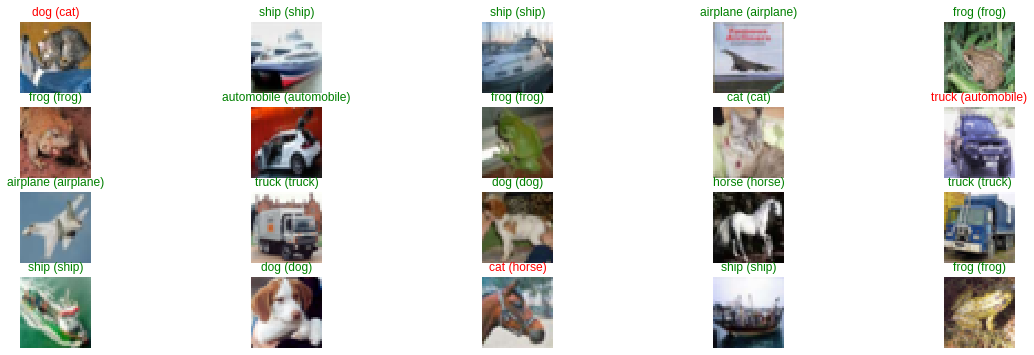

In [44]:
fig = plt.figure(figsize = (20,6))
for i in range(20):
  ax = fig.add_subplot(4,5,i+1 , xticks = [], yticks = [])
  ax.imshow(x_test[i])
  pred_ax = np.argmax(y_hat[i])
  true_ax = np.argmax(y_test[i])
  ax.set_title("{} ({})".format(cifar10_labels[pred_ax] , cifar10_labels[true_ax]) , 
               color = ('green' if pred_ax == true_ax else 'red'))